# Diabetes prediction with KNN¶


In [10]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale,StandardScaler # for standardization
from sklearn.model_selection import train_test_split, GridSearchCV ,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score, mean_squared_error, r2_score,classification_report,roc_auc_score,roc_curve
from sklearn.neighbors import KNeighborsClassifier##  library for KNN


In [2]:
# turn off alerts
from warnings import filterwarnings
filterwarnings ('ignore')

# Dataset and Story

Purpose: There is some information about the people in the data set kept in our hospital. We are asked to perform a estimation model about whether the person has diabetes according to the results of the analysis.

In [3]:
df= pd.read_csv("diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Model and Prediction

In [5]:
df["Outcome"].value_counts()  # representation numbers of the dependent variable.

0    500
1    268
Name: Outcome, dtype: int64

Veride 1 yani şeker hastası sayısında 268 adet kişinin bilgileri, 0 yani şeker hastası olmayan kişilerin verilerinden ise 500 kişinin bilgileri bulunmaktadır.

In [6]:
df.describe().T # descriptive statistics

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y=df["Outcome"]# get dependent variable
X=df.drop(["Outcome"], axis=1) # bağımsız değişkenleri alınması
X_train,X_test,y_train,y_test = train_test_split(X,# independent variable
                                                y, #the dependent variable
                                                test_size=0.30,# test data
                                                random_state=42) 

In [11]:
knn_model=KNeighborsClassifier().fit(X,y)# model installed


In [17]:
y_pred = knn_model.predict(X) # predictive acquisition values

In [18]:
accuracy_score(y,y_pred) # success rate

0.8033854166666666

In [19]:
print(classification_report(y,y_pred)) #detailed reporting

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       500
           1       0.75      0.65      0.70       268

    accuracy                           0.80       768
   macro avg       0.79      0.77      0.78       768
weighted avg       0.80      0.80      0.80       768



In [20]:
knn_model.predict_proba(X)[0:10]# gives the probability of classes.

array([[0.4, 0.6],
       [0.8, 0.2],
       [0.2, 0.8],
       [1. , 0. ],
       [0.4, 0.6],
       [0.6, 0.4],
       [0.8, 0.2],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.8, 0.2]])

### ROC Eğrisi

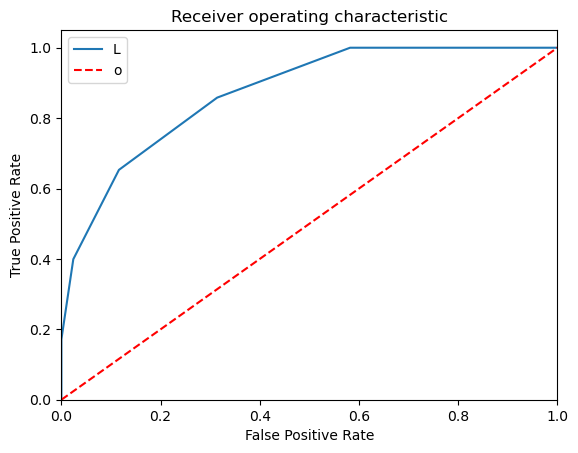

In [33]:
logit_roc_auc = roc_auc_score(y,knn_model.predict(X)) # grafic
fpr,tpr,theresholds= roc_curve(y,knn_model.predict_proba(X)[:,1])#curve
plt.figure() 
plt.plot(fpr,tpr,label='AUC (area= %0.2f)'  % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')# axis
plt.xlim([0.0,1.0])#axis
plt.ylim([0.0,1.05])#axis
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.legend ('Log_ROC')
plt.show()

Comment: A graph that plots False-Positive rejection vs. True-Positive rejects to predict model success.

# Model Tuning

In [21]:
knn= KNeighborsClassifier()# model object

In [23]:
knn_params={"n_neighbors": np.arange(1,50)}#grouping of parameters

In [24]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=10).fit(X_train,y_train)

In [25]:
#best model success values
knn_cv_model.best_score_


0.748637316561845

In [26]:
#the most ideal parameters
knn_cv_model.best_params_

{'n_neighbors': 11}

In [27]:
#final model
knn_tuned= KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)

In [31]:
y_pred=knn_tuned.predict(X_test)

In [32]:
accuracy_score(y_test,y_pred)

0.7316017316017316